In [1]:
#!canda install pydot
#!conda install graphviz
#!conda install pydotplus

In [2]:
from numpy import array
from keras.preprocessing import text
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalMaxPooling1D
from keras.utils.vis_utils import plot_model
from keras.layers.embeddings import Embedding
from keras.callbacks import LambdaCallback

In [3]:
# define documents
docs = ['राम्रो छ',
'राम्रो काम',
'राम्रो प्रयास',
'ठिक छ',
'सहि छ',
'गलत छैन',
'गलत  छ',
'नराम्रो प्रयास',
'राम्रो छैन',
'नराम्रो काम',
'अझै राम्रो  गर्नु पर्दछ']
# define class labels
labels = array([1,1,1,1,1,1,0,0,0,0,0])

In [4]:
# tokenize documents
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(docs)
word2idx = tokenizer.word_index

In [5]:
# integer encode the documents
encoded_docs = [[word2idx[w] for w in text.text_to_word_sequence(doc)] for doc in docs]
print(encoded_docs)

[[1, 2], [1, 3], [1, 4], [8, 2], [9, 2], [5, 6], [5, 2], [7, 4], [1, 6], [7, 3], [10, 1, 11, 12]]


In [6]:
print()

In [7]:
print([text.text_to_word_sequence(doc) for doc in docs])

[['राम्रो', 'छ'], ['राम्रो', 'काम'], ['राम्रो', 'प्रयास'], ['ठिक', 'छ'], ['सहि', 'छ'], ['गलत', 'छैन'], ['गलत', 'छ'], ['नराम्रो', 'प्रयास'], ['राम्रो', 'छैन'], ['नराम्रो', 'काम'], ['अझै', 'राम्रो', 'गर्नु', 'पर्दछ']]


In [8]:
print(word2idx)

{'राम्रो': 1, 'छ': 2, 'काम': 3, 'प्रयास': 4, 'गलत': 5, 'छैन': 6, 'नराम्रो': 7, 'ठिक': 8, 'सहि': 9, 'अझै': 10, 'गर्नु': 11, 'पर्दछ': 12}


In [9]:
# pad documents to a max length of 4 words
max_length = 4
vocab_size = 15 
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length ))
model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

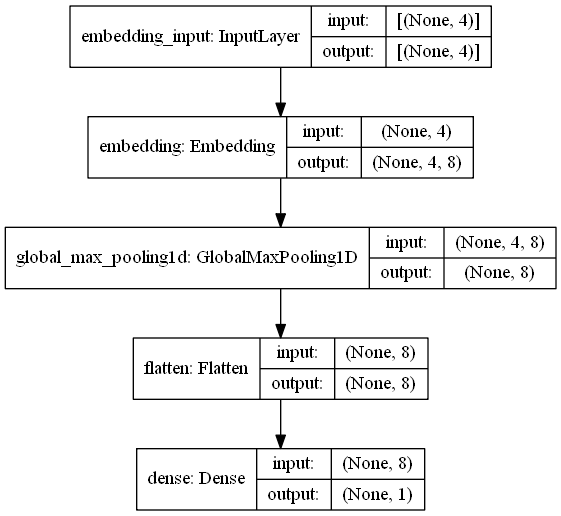

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
plot_model(model, to_file='sentiment_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
# fit the model
model.fit(padded_docs, labels, epochs=1000, verbose=0 )
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 100.000000


In [12]:
text_input = "गलत छैन"
print("राम्रो" if model.predict(pad_sequences([[word2idx[w] for w in text.text_to_word_sequence(text_input)]], maxlen=max_length, padding='post'))[0] > 0.5 else "नराम्रो")

राम्रो
